# International Trade Network Analysis: Understanding Global Economic Interactions

International trade forms the backbone of the global economy, facilitating the exchange of goods, services, and resources between countries. The intricate web of trade relationships not only impacts national economies but also influences global economic stability and growth. Understanding these relationships is crucial for policymakers, economists, and business leaders alike. In this context, network analysis provides a powerful tool to unravel the complexities of international trade.

International trade networks are dynamic and complex. By analyzing these networks, we can uncover patterns, trends, and key players that shape global trade. Through centrality measures we can identify countries that play a central role in the trade network. These central countries often act as major hubs, influencing trade flows and economic policies.

In [ ]:
from utils import *

In [ ]:
with open('countries.json', 'r') as file:
    data = json.load(file)

Probably due to the apostrophe, the scraping for Cote d'Ivoire fails, and there is no entry in the dataset, although the country being mentioned as an Import and Export partner by several countries, hence we insert the country manually taking its data from its [dataset web-page](https://www.cia.gov/the-world-factbook/countries/cote-divoire/summaries).

In [ ]:
data['Cote d\'Ivoire'] = {
    "Economy: Real GDP (purchasing power parity)": "$202.758 billion (2023 est.)$190.319 billion (2022 est.)$179.178 billion (2021 est.)",
    "Economy: GDP - composition, by end use - exports of goods and services": "30.8%",
    "Economy: GDP - composition, by end use - imports of goods and services": "-30.1% (2017 est.)",
    "Economy: Exports": "$17.211 billion (2022 est.)$16.23 billion (2021 est.)$13.232 billion (2020 est.)",
    "Economy: Exports - partners": "Switzerland 9%, Mali 8%, Netherlands 8%, US 6%, France 5% (2022)",
    "Economy: Exports - commodities": "cocoa beans, gold, rubber, refined petroleum, cocoa paste (2022)",
    "Economy: Imports": "$19.948 billion (2022 est.)$16.191 billion (2021 est.)$12.66 billion (2020 est.)",
    "Economy: Imports - partners": "China 18%, Nigeria 11%, France 8%, India 5%, Belgium 4% (2022)",
    "Economy: Imports - commodities": "crude petroleum, refined petroleum, ships, rice, fish (2022)",
    "Geography: Geographic coordinates": "8 00 N, 5 00 W",
    "Government: Government type": "presidential republic"
}

To be fair, there were some other countries missing: Guadeloupe, Martinique, Mayotte, Reunion and French Guiana.

From the official The World Factbook [FAQs]():

> **Why has The World Factbook dropped the five French departments of Guadeloupe, Martinique, Mayotte, Reunion, and French Guiana?**
> The five entities are no longer in the World Factbook because their status has changed. While they are overseas departments of France, they are also now recognized as French regions, having equal status to the 22 metropolitan regions that make up European France. In other words, they are now recognized as being part of France proper. Their status is somewhat analogous to Alaska and Hawaii vis-à-vis the contiguous United States. Although separated from the larger geographic entity, they are still considered to be an integral part of it.

We ultimately retrieved the updated [exports](https://www.cia.gov/the-world-factbook/references/guide-to-country-comparisons/) and [imports](https://www.cia.gov/the-world-factbook/field/imports/country-comparison/) values from the [Factbook website](https://www.cia.gov/the-world-factbook/references/guide-to-country-comparisons/).

In [ ]:
imports = pd.read_csv("Imports.csv")
exports = pd.read_csv("Exports.csv")
gdps = pd.read_csv("gdp.csv")

missing_imports, missing_exports, missing_gdps = [], [], []

for country in data:
    imports_row = imports[imports["name"] == country]
    exports_row = exports[exports["name"] == country]
    gdp_row = gdps[gdps["name"] == country]

    if not imports_row.empty:
        data[country]["Economy: Imports"] = parse_value(imports_row.iloc[0]['value'])
    else:
        missing_imports.append(country)

    if not exports_row.empty:
        data[country]["Economy: Exports"] = parse_value(exports_row.iloc[0]['value'])
    else:
        missing_exports.append(country)

    if not gdp_row.empty:
        data[country]["Economy: Real GDP (purchasing power parity)"] = parse_value(gdp_row.iloc[0]['value'])
    else:
        missing_gdps.append(country)

print("\nCountries missing updated GDP data:")
print(", ".join(country for country in missing_gdps))

print("\nCountries missing updated imports data:")
print(", ".join(country for country in missing_imports))

print("\nCountries missing updated exports data:")
print(", ".join(country for country in missing_exports))


Countries missing updated GDP data:
Akrotiri, Anguilla, Antarctica, Ashmore and Cartier Islands, Baker Island, Bouvet Island, British Indian Ocean Territory, Christmas Island, Clipperton Island, Cocos (Keeling) Islands, Coral Sea Islands, Dhekelia, French Southern and Antarctic Lands, Heard Island and McDonald Islands, Holy See (Vatican City), Howland Island, Jan Mayen, Jarvis Island, Johnston Atoll, Kingman Reef, Midway Islands, Montserrat, Navassa Island, Norfolk Island, Palmyra Atoll, Paracel Islands, Pitcairn Islands, Saint Barthelemy, Saint Helena, Ascension, and Tristan da Cunha, Saint Martin, Spratly Islands, Svalbard, Wake Island, Wallis and Futuna, World

Countries missing updated imports data:
Akrotiri, Antarctica, Ashmore and Cartier Islands, Baker Island, Bouvet Island, British Indian Ocean Territory, Christmas Island, Clipperton Island, Cocos (Keeling) Islands, Coral Sea Islands, Dhekelia, Falkland Islands (Islas Malvinas), French Southern and Antarctic Lands, Gibraltar, 

We finally drop some countries who showed to have incorrect values.

In [ ]:
del data['Guernsey']
del data['Isle of Man']
del data['Jersey']
del data['Montserrat']
del data['Saint Martin']
del data['Wallis and Futuna']

# 1. Network Creation
## Data Preprocessing

First, we select the countries that are not missing any necessary information.

In [ ]:
old_keys = list(key_mapping.keys())

# Filter the data
filtered_data = {}
missing_data = []

for country, info in data.items():
    # Check if the country is France and adjust the key accordingly
    if country == 'France':
        required_keys = set(old_keys)
        required_keys.remove("Geography: Geographic coordinates")
        required_keys.add("Geography: Geographic coordinates - metropolitan France")
    else:
        required_keys = set(old_keys)

    # Check if all required keys are present
    if required_keys <= set(info.keys()):
        filtered_data[country] = info
    else:
        missing_data.append(country)

data = filtered_data

print("\nCountries missing required data:")
print(", ".join(country for country in missing_data))


Countries missing required data:
Akrotiri, Anguilla, Antarctica, Ashmore and Cartier Islands, Baker Island, Bouvet Island, British Indian Ocean Territory, Christmas Island, Clipperton Island, Cocos (Keeling) Islands, Coral Sea Islands, Dhekelia, French Southern and Antarctic Lands, Gaza Strip, Heard Island and McDonald Islands, Holy See (Vatican City), Howland Island, Jan Mayen, Jarvis Island, Johnston Atoll, Kingman Reef, Liechtenstein, Midway Islands, Navassa Island, Norfolk Island, Palmyra Atoll, Paracel Islands, Pitcairn Islands, Saint Barthelemy, Saint Helena, Ascension, and Tristan da Cunha, Sint Maarten, Spratly Islands, Svalbard, Wake Island, West Bank, World


In [ ]:
# Loop over each country and its associated data in the 'data' dictionary.
for country, country_data in data.items():
    # Adjust the keys specifically for France
    updated_country_data = {}
    for key, value in country_data.items():
        if country == "France" and key == "Geography: Geographic coordinates - metropolitan France":
            updated_country_data["Coordinates"] = value
        elif key in old_keys:
            new_key = key_mapping.get(key, key)
            updated_country_data[new_key] = value

    data[country] = updated_country_data

Clean up any unecessary element from our strings.

In [ ]:
# Loop over each country's data to clean up percentage values by removing '%' and any text after a space and parentheses.
for country_data in data.values():
    for key, value in country_data.items():
        if key not in ["GDP", "Exports $","Imports $"]:
            # Extract the part of the value before the first occurrence of ' (' and remove the '%' sign.
            tempval = value.split(' (')[0]
            # Update the value in the dictionary after stripping the '%' sign.
            country_data[key] = tempval.strip('%')

Process each export and imports partners string to create lists.

In [ ]:
# Loop over each country's data to process export and import partners.
for country_data in data.values():
    # Process the 'Export Partners' string, splitting it into individual partner entries.
    export_partners_str = country_data['Export Partners']
    export_partners = export_partners_str.split(', ')

    # Create a new dictionary to hold the export partners and their associated percentages.
    export_partner_associations = {}

    # Loop over each partner string to separate the partner's name and the percentage.
    for partner_str in export_partners:
        last_space_index = partner_str.rfind(' ')
        partner = partner_str[:last_space_index]  # Extract the partner's name.
        percentage = partner_str[last_space_index+1:]  # Extract the percentage.
        percentage = percentage.replace(',', '')  # Remove commas from the percentage.
        percentage = percentage.replace('%', '')  # Remove the '%' sign.

        # Add the partner and percentage to the 'export_partner_associations' dictionary.
        export_partner_associations[partner] = percentage

    # Update the 'Export Partners' entry in the country's data with the new dictionary.
    country_data['Export Partners'] = export_partner_associations

    # Similar process for 'Import Partners'.
    import_partners_str = country_data['Import Partners']
    import_partners = import_partners_str.split(', ')

    # Create a new dictionary to hold the import partners and their associated percentages.
    import_partner_associations = {}

    # Loop over each partner string to separate the partner's name and the percentage.
    for partner_str in import_partners:
        last_space_index = partner_str.rfind(' ')
        partner = partner_str[:last_space_index]  # Extract the partner's name.
        percentage = partner_str[last_space_index+1:]  # Extract the percentage.
        percentage = percentage.replace(',', '')  # Remove commas from the percentage.
        percentage = percentage.replace('%', '')  # Remove the '%' sign.

        # Add the partner and percentage to the 'import_partner_associations' dictionary.
        import_partner_associations[partner] = percentage

    # Update the 'Import Partners' entry in the country's data with the new dictionary.
    country_data['Import Partners'] = import_partner_associations

We then convert each coordinate information to a format convenient for our plots.

In [ ]:
# Loop over each country's data to convert coordinates into decimal format.
for country_data in data.values():
    coordinates = country_data.get("Coordinates")
    if coordinates:
        # Convert the coordinates to decimal format using the 'convert_to_decimal' function.
        country_data["Coordinates"] = convert_to_decimal(coordinates)

With the help of some experts in the field, we reduced our government types taxonomy by merging similar types into broader macrocategories.

In [ ]:
government_types = list(set([data[country]['Government type'] for country in data]))

print(f'There are {len(government_types)} different kind of government in our dataset.')

There are 51 different kind of government in our dataset.


In [ ]:
for country in data:
    current_type = data[country].get("Government type").replace('\xa0', ' ')
    if current_type in government_type_mapping:
        data[country]["Government type"] = government_type_mapping[current_type]
    else:
        print(f"Warning: Government type '{current_type}' for country '{country}' not found in mapping.")

government_types = list(set([attributes["Government type"] for attributes in data.values()]))
print(f'There are {len(government_types)} different kinds of government in our dataset after the update.')

There are 19 different kinds of government in our dataset after the update.


And finally, after some careful researches, we did the same for the commodities.

In [ ]:
# Map export commodities to Level 2 SITC codes, avoiding duplicates
for country in data:
    export_commodities_sitc = set()  # Use a set to avoid duplicates
    commodities_export = data[country].get('Export Commodities', '')
    for commodity in [commodity.strip() for commodity in commodities_export.split(',')]:
        sitc_level_2 = get_sitc_level_2(commodity, sitc_hierarchy)
        if sitc_level_2:
            export_commodities_sitc.add(sitc_level_2)  # Add to the set

    # Convert set back to a list
    data[country]['Export Commodities SITC'] = list(export_commodities_sitc)

## Trades Dataframe

In [ ]:
# Create exports dataframe and node attributes
trade_df, node_attributes = create_df(data, country_mapping)
trade_df

source                target
0              Afghanistan  United Arab Emirates
1              Afghanistan              Pakistan
2              Afghanistan                 India
3              Afghanistan                 China
4     United Arab Emirates           Afghanistan
...                    ...                   ...
1827                 China         Cote d'Ivoire
1828               Nigeria         Cote d'Ivoire
1829                France         Cote d'Ivoire
1830                 India         Cote d'Ivoire
1831               Belgium         Cote d'Ivoire

[1832 rows x 2 columns]

## Network

In [ ]:
G = create_graph(trade_df, node_attributes)

# Check number of nodes and edges
print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in graph: {G.number_of_edges()}")

# Print attributes of a sample node in the graph
sample_node = list(G.nodes())[0]  # Get the first node
print(f"\nSample node attributes in the graph ({sample_node}):")
print("\n".join(f'\t{key}: {value}' for key, value in G.nodes[sample_node].items()))

Number of nodes in the graph: 216
Number of edges in graph: 1832

Sample node attributes in the graph (Afghanistan):
	Government Type: Theocratic
	GDP: 80416000000
	Export Commodities: ['gold', 'figs', 'grapes', 'cotton', 'fruits and nuts', 'coal']
	Export Commodities SITC: ['32 - Coal, coke and briquettes', '05 - Vegetables and fruit', '26 - Textile fibers and their wastes', '97 - Gold, non-monetary']
	x: 65.0
	y: 33.0


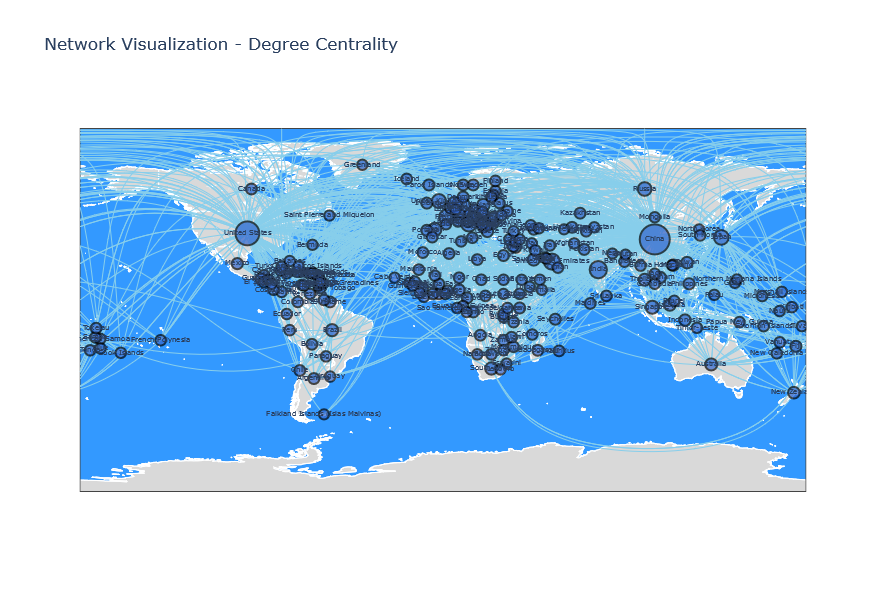

In [ ]:
degree_centrality = nx.degree_centrality(G)
plot_network_on_world_map(G, degree_centrality, title='Network Visualization - Degree Centrality')

# 2. Measures

## Which kind of countries play a major role in trade flow and which do not?
### Degree Centrality

Degree centrality measures the number of direct connections a node has. In the context of a trade network, it indicates the number of trade partners a country has. A higher degree centrality means that a country has more direct trade relationships, suggesting its central role in the network.

In [ ]:
top_countries, worst_countries = histograms(degree_centrality, type='Degree Centrality', n=10)

In [ ]:
plot_attribute("Government Type", node_attributes, top_countries, worst_countries)

Top Countries
	Country                   | Government Type                         
	-----------------------------------------------------------------
	China                     | Communist State                         
	United States             | Federal Republic                        
	Germany                   | Federal Parliamentary Republic          
	India                     | Federal Parliamentary Republic          
	United Arab Emirates      | Federation of Monarchies                
	France                    | Semi-Presidential Republic              
	Italy                     | Parliamentary Republic                  
	Japan                     | Constitutional Monarchy                 
	Netherlands               | Constitutional Monarchy                 
	United Kingdom            | Constitutional Monarchy                 

Worst Countries
	Country                   | Government Type                         
	-------------------------------------------------------------

The analysis of the top 10 and worst 10 countries by degree centrality in the trade network reveals some intriguing patterns related to government types and global economic integration. The countries with the highest centrality are predominantly democracies, including federal republics like the **United States** and **Germany**, as well as parliamentary systems like those found in **Japan**, the **UK**, and much of the **European Union**. This suggests that democratic governance, often associated with open markets and strong international ties, tends to correlate with higher trade centrality. Interestingly, many of the top countries belong to the European Union, indicating that regional economic integration, along with shared governance standards, might also play a significant role in boosting trade centrality.

In contrast, the countries with the lowest centrality often have more authoritarian or hybrid regimes, such as **North Korea**, **Turkmenistan**, and **Eswatini**, which are typically more isolated from global trade networks. Additionally, smaller nations or those with challenging economic conditions, like **Nepal** or **South Sudan**, also appear at the bottom, reinforcing the idea that both governance and economic development are critical factors in global trade positioning.

In [ ]:
out_degree_centrality = nx.out_degree_centrality(G)
top_countries, worst_countries = histograms(out_degree_centrality, type='Out-Degree Centrality', n=10)

In [ ]:
in_degree_centrality = nx.in_degree_centrality(G)
top_countries, worst_countries = histograms(in_degree_centrality, type='In-Degree Centrality', n=10)

In [ ]:
top_centrality_diff(out_degree_centrality, in_degree_centrality, typello='Out/In-Degree Centrality', type1='Out', type2='In', top_n=10, color1='lightcoral', color2='skyblue', relative=False)

In [ ]:
top_centrality_diff(out_degree_centrality, in_degree_centrality, typello='Out/In-Degree Centrality', type1='Out', type2='In', top_n=10, color1='lightcoral', color2='skyblue', relative=True)

The first plot highlights the countries with the most significant absolute differences between out-degree (export) and in-degree (import) centrality in their trade networks. Notably, **China** exhibits a substantial out-degree centrality, indicating its prominent role as a global exporter. This aligns with China's well-known position as the "world's factory", supplying a wide array of goods to markets across the globe. However, its relatively lower in-degree centrality reflects China's strategic efforts to reduce dependency on imports, further emphasizing its self-reliance in key sectors. **Switzerland** presents an interesting case with a relatively high difference between its out-degree and in-degree centrality. This discrepancy may be attributed to Switzerland's strong export-driven economy, particularly in high-value sectors like pharmaceuticals, machinery, and financial services, while it imports less in comparison.

The second plot sheds light on countries with the highest relative differences in out-degree and in-degree centrality. Interestingly, many of the countries listed here are smaller or less economically dominant on the global stage, such as **Burundi**, **Eritrea**, and **Saint Lucia**. These high relative differences are likely a result of their unique economic circumstances. Small countries often have high import centrality due to their need to import essential goods that cannot be produced domestically. Conversely, some small nations may exhibit high out-degree centrality due to niche exports or due to political and economic strategies aimed at self-sufficiency or specialization in specific industries. **Switzerland** again appears in this list, albeit this time for its high relative difference, reinforcing its unique position as a country that maintains a substantial export volume relative to its import needs.

## Is the trade flow mostly controlled by a few countries?
### Degree Centrality Distribution

The degree centrality distribution is crucial for understanding the connectivity pattern within a trade network. Fitting this distribution to a power law can reveal whether the network has a scale-free structure, characterized by a few highly connected nodes (hubs) and many nodes with fewer connections. This is significant because it indicates the presence of dominant countries that act as major trade hubs, which can have substantial implications for network resilience, trade flow efficiency, and economic influence.

In [ ]:
slope = plot_centrality_power_law(degree_centrality, bins=60, type='Degree', color='skyblue')

The slope of the line is: -1.38428978948183


The negativity as well as the consistently high absolute value of the fitted line, suggests that just a few nodes of our network are highly connected, while the majority of them entertains commercial relationships with just a few countries.

### Cumulative Distribution for Degree Centrality

The cumulative distribution for degree centrality provides a complementary perspective by showing the proportion of nodes (countries) with a degree centrality greater than or equal to a certain value. This plot helps to emphasize the tail of the distribution, making it easier to identify the presence and significance of highly connected countries (hubs) within the trade network.

In [ ]:
cumulative_distribution(degree_centrality,type='Degree', color='skyblue')

The huge steep suggests again that a few number of countries have high degree centrality, reinforcing the idea that the trade network may be dominated by a few powerful hubs.

### Pagerank

PageRank is an alternative measure to eigenvector centrality that takes into account both the quantity and quality of incoming links. A high PageRank is given to those countries whose trading partners are themselves highly ranked. In other words, a country with a high PageRank has strong trade connections with other influential or well-connected countries, indicating that it is part of a network where it is linked to and valued by prominent players.

In [ ]:
pagerank = nx.pagerank(G)
heatmap(pagerank, type='Pagerank')

The observation of this geographic heatmap is particularly striking. It seems that countries renowned for their poverty are excluded from the trade routes that are instead maintained among significantly developed countries. **European countries**, **China**, **India**, and the **United States** have the highest values.

## Is this group of strictly interconnected nations composed by wealthy states?

We can take again into account the PageRank measure to have an highlight of the most influential countries in the network as long as the least influential ones. Then we can compare it to the *GDP* (*Gross Domestic Product*) of each country to help us answering the question. The GDP is the total monetary value of all goods and services produced and sold within a country during one year, and it's a good indicator of the general wealth of a nation.

In [ ]:
top_countries, worst_countries = histograms(pagerank, type='Pagerank', n=15)

In [ ]:
gdps = extract_node_attributes(G, 'GDP')

top_countries = histograms(gdps, type='GDP', n=20, color='lightgreen', results='top')

It's immediately visible a similar trend between the histograms: many of the same countries appear in the top ranks for both GDP and PageRank, such as the **United States**, **China*, **Germany**, and **India**. There is also a noticeable drop in both values after the top few countries; while a few countries are exceptionally dominant in both economic and network terms, the majority of countries in the top 20 have significantly lower values, reflecting a sharp concentration of power and influence among the top global players.

We can further inspect this possible correlation by computing the *Pearson Correlation Coefficient* between our values; it measures the linear relationship between two variables, and it can be applied to understand whether countries that are more central in thr network according to their PageRank values also tend to have higher (or lower) GDPs.

In [ ]:
correlation, p_value = correlation_centrality_gdp(pagerank, gdps)

Pearson correlation coefficient: 0.8564
P-value: 2.2826e-63


The Pearson correlation coefficient is 0.8564, which is very close to 1, indicating a strong positive linear relationship between the PageRank values and GDP. The strength of the correlation suggests that the relationship between PageRank and GDP can be well-approximated by a linear model, where an increase in PageRank is associated with an increase in GDP.

The p-value is extremely small (p = 2.2826e-63), much smaller than the typical significance level of 0.05: the likelihood of observing such a strong correlation by random chance is virtually zero. In hypothesis testing, a small p-value allows us to reject the null hypothesis, which would typically state that there is no linear relationship between the two variables. Therefore, we can confidently say that there is a statistically significant correlation between PageRank values and GDP.

The distribution in the scatter plot furthermore validate the thesis. Most data points appear clustered towards the lower end of both PageRank and GDP, but a few countries with higher PageRank values also have higher GDPs, contributing to the strong positive correlation.

## What is the role of China and USA?
### Hyperlink-Induced Topic Search (HITS)

Although the other measures already stressed the unquestionable position of control assumed by these two countries, let us now assess their role. *HITS* (*Hyperlink-Induced Topic Search*) is an algorithm used to rank web pages based on their link structure, identifying *hubs* (nodes linking to many other nodes) and *authorities* (nodes that are linked to by many hubs). In our network, HITS would identify major exporters (hubs) and influential importers (authorities); the **USA** and **China** would likely emerge in both standings, highlighting their central roles.

In [ ]:
hubs, authorities = nx.hits(G)

plot_network_on_world_map(G, hubs, title='Network Visualization - Hubs', edges_color='#eba75e', markers_color='#e67905')

In [ ]:
plot_network_on_world_map(G, authorities, title='Network Visualization - Authorities', edges_color='#6aeb5e', markers_color='#1dde0b')

**China** corroborates its proficiency in exportation, while the **US** attests to its important role as a major authorithy for commodity traffic.

What happens if we remove both these countries?

In [ ]:
G_temp = G.copy()

G_temp.remove_nodes_from(['United States', 'China'])

print(f"Number of edges in complete graph: {G.number_of_edges()}")
print(f"Number of edges in graph: {G_temp.number_of_edges()}")

degree_centrality_temp = nx.degree_centrality(G_temp)
plot_network_on_world_map(G_temp, degree_centrality_temp, title='Network Visualization - Degree Centrality')

Number of edges in complete graph: 1832
Number of edges in graph: 1356


The reduction in term of number of edges is substantial, as many countries were trading commodities with the two super powers; in their absence, there is a shift towards European nations, as indicated by the larger circles representing their degree centrality, which, while unchanged, is now relatively higher in the network.

In [ ]:
hubs_temp, authorities_temp = nx.hits(G_temp)

plot_network_on_world_map(G_temp, hubs_temp, title='Network Visualization - Hubs', edges_color='#eba75e', markers_color='#e67905')

In [ ]:
plot_network_on_world_map(G_temp, authorities_temp, title='Network Visualization - Authorities', edges_color='#6aeb5e', markers_color='#1dde0b')

The shift towards European countries is evident; the hubs (nodes connecting to many other nodes) experience significant growth, particularly among EU countries. On the other hand, the authorities (nodes that receive many links) show a general decrease for all countries except the European ones: this suggests that smaller countries were likely trading with the two superpowers while relying on imports from other nations.

### SimRank

SimRank is a similarity metric that says “two objects are considered to be similar if they are referenced by similar objects.”

The pseudo-code definition from the paper is:

```python
def simrank(G, u, v):
    in_neighbors_u = G.predecessors(u)
    in_neighbors_v = G.predecessors(v)
    scale = C / (len(in_neighbors_u) * len(in_neighbors_v))
    return scale * sum(
        simrank(G, w, x) for w, x in product(in_neighbors_u, in_neighbors_v)
    )
```

Similarity in SimRank works by measuring how alike two nodes are based on the similarity of their neighbors. In this network, a high SimRank score between two countries indicates that they trade with similar partners; the huge amount of partners that China has could potentially bias the results.

In [ ]:
simrank_dict = nx.simrank_similarity(G)

simrank_plot(simrank_dict, type='SimRank: Trade Partners Closer to China or US ones')

As we observe, the countries looks almost splitted in half, with the left part labeled as **US** and the right part as **China**; this behaviour is expected, since probably closer countries tend to trade with closer neighbours, leading the algorithm to split them territorially.

## Local Clustering coefficient

The clustering coefficient measures the degree to which nodes in a graph tend to cluster together; it corresponds to the ratio between the connected pairs of neighbors of a node over all its neighbors pairs.

A higher clustering coefficient could suggests that countries tend to trade more with their neighbors, forming tightly-knit clusters; we want to explore this measure to confirm our previously formulated hypotesis that this may be the reason why *SimRank* splits the world in half when looking for countries more similar either to **China** or **United States**.

In [ ]:
clustering_coeffs = nx.clustering(G)

high_clustering_nodes = histograms(clustering_coeffs, type='Local Clustering Coefficient', n=10, color='skyblue')
heatmap(clustering_coeffs, type='Clustering Coefficient')

Indeed, the values are generally high, with the exception of the two major powers, which have a substantially higher number of neighbors compared to other countries. States tend to trade with their geographic neighbors, which is why countries on the left side of the world have more trading partners in common with the **US**, while those on the right side have more trading partners in common with **China**.

##  Are the commodities traded in the backbone of the International Trade Network also the most globally traded?

### K-cores decomposition
A *k-core* is relaxation of the clique concept consisting of a connected set of nodes where each is joined to at least k of the others. Analyzing k-cores allows us to identify the most influential and interconnected nodes within the trade network, which are crucial for understanding the backbone of the trade network.

In [ ]:
core, highest_core = kcores(G, 5, 20)


Nodes in the 5-core (208 elements): ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 

The highest value for which a core exists in the network is 12, leaving us with a group of 20 countries that are part of a highly interconnected sub-network. The majority of the countries in this core are European (e.g., Austria, Belgium, France, Germany, Italy, the Netherlands, Poland, etc.), reflecting that Europe, as a region, has a high level of internal connectivity. As expected, the usual global powers (China and the United States) are included in the 12-core, but apart from Russia they are the only extra-European representatives.

Instead, the presence of smaller states like San Marino and Montenegro, which have much lower population and land area compared to other countries in the core, can be implied by their geographical position as well as the type of commodities traded. We can further explore this aspect by directly analyzing what these countries are trading.

In [ ]:
plot_network_on_world_map(G, degree_centrality, cliques=highest_core)

In [ ]:
# papello sulla SITC

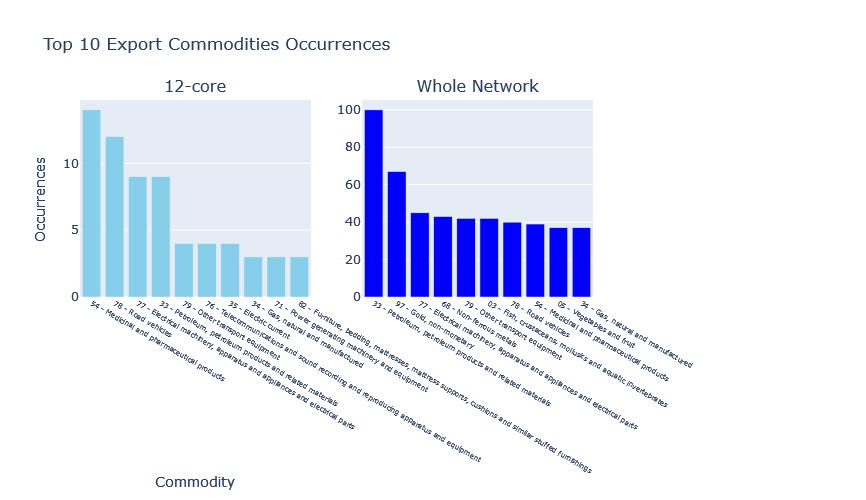

In [ ]:
filtered_attributes = {key: node_attributes[key] for key in highest_core if key in node_attributes}
sorted_commodities_count = count_commodities(filtered_attributes, node_attributes, n=10)

In [ ]:
#differenze sui top, analizziamo ad esempio il petrolio (e l'oro?)

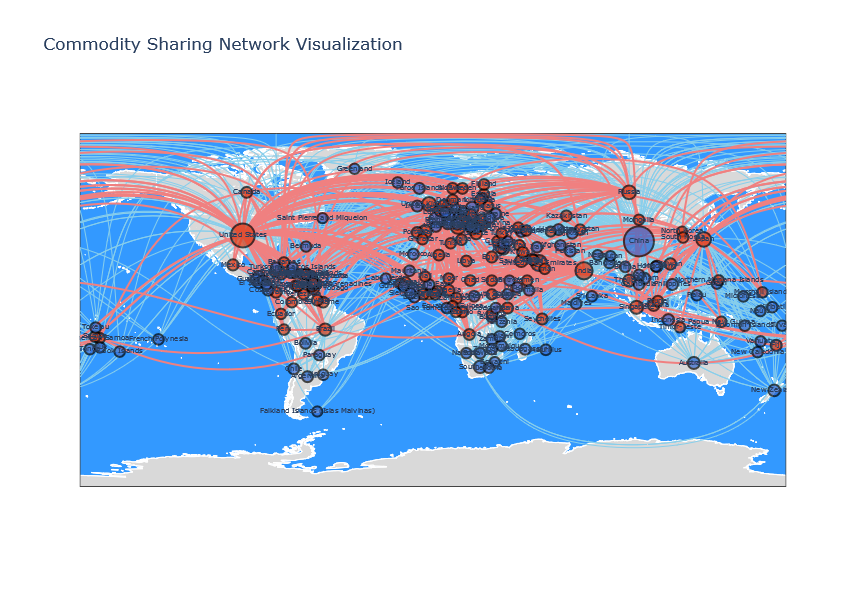

In [ ]:
plot_commodity_on_world_map(G, degree_centrality, '33 - Petroleum, petroleum products and related materials')

In [ ]:
# esclusione di gran parte dell'europa, eventuali similitudini con la periferia della rete (calcolata escludendo la k-core)

## Are the countries in the backbone really crucial to the stability of the network?
### Assortative mixing by degree

Assortative mixing by degree measures the tendency of nodes to connect to other nodes that are similar in degree. In the context of trade networks, this can indicate whether countries with similar trade volumes tend to trade with each other. High assortative mixing suggests that countries with high trade volumes (high-degree nodes) tend to trade more with other high-volume countries, while low assortative mixing might indicate a more diverse set of trade partners irrespective of trade volume.

In [ ]:
assortativity_coefficient = nx.degree_assortativity_coefficient(G)

print(f"Assortative Mixing by Degree: {assortativity_coefficient:.4f}")

Assortative Mixing by Degree: -0.2950


### Density
Graph density is a measure of how many edges are present in the graph compared to the maximum possible number of edges. It gives a sense of how "dense" or "sparse" the network is. In the context of trade networks, density indicates the overall connectivity among countries. A denser network suggests that there are more trade relationships between countries, indicating a more interconnected and potentially robust global trade system.

In [ ]:
graph_density = nx.density(G)

print(f"Graph Density: {graph_density:.4f}")

Graph Density: 0.0394


In [ ]:
# papello su come togliere la backbone con density e assortative basso faccia danni